<a href="https://colab.research.google.com/github/Div25singh/Loan_Prediction/blob/main/LoanML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Dataset - LoanPrediction**



# **1 . Import Libraries/Dataset**


In [1]:
# Import Libraries/Dataset
import pandas as pd

# Load the dataset
df = pd.read_csv("loan_data.csv")

In [2]:
# Import required libraries for data analysis and visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **2. Data Visualization and Exploration**

# 2.A -Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them**

In [3]:
# Set style for seaborn
sns.set(style="whitegrid")

# Data Visualization and Exploration

# Display the first few rows of the dataset
print(df.head(2))

   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  


# 2.B - Comment on class imbalance with appropriate visualization method.


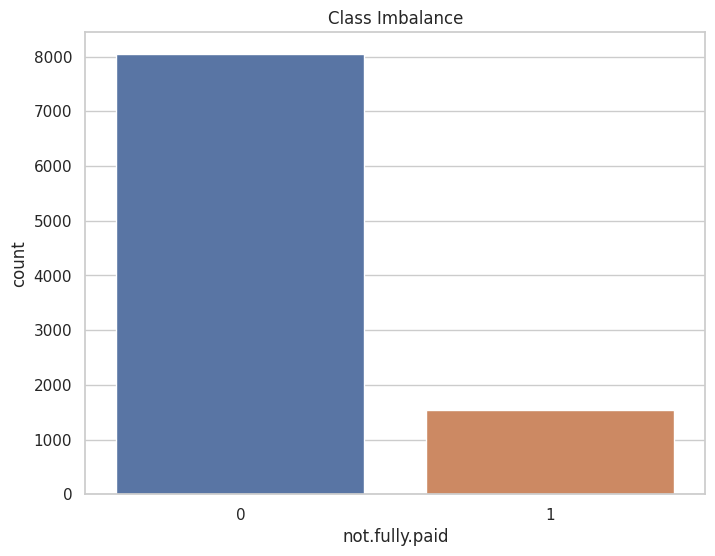

In [4]:
# Check for class imbalance

# Visualize class imbalance using a count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='not.fully.paid', data=df)
plt.title("Class Imbalance")
plt.show()


If one bar is much taller than the other, it suggests a class imbalance, with the taller bar representing the majority class and the shorter bar representing the minority class.

# 2.C - Provide appropriate data visualizations to get an insight about the dataset

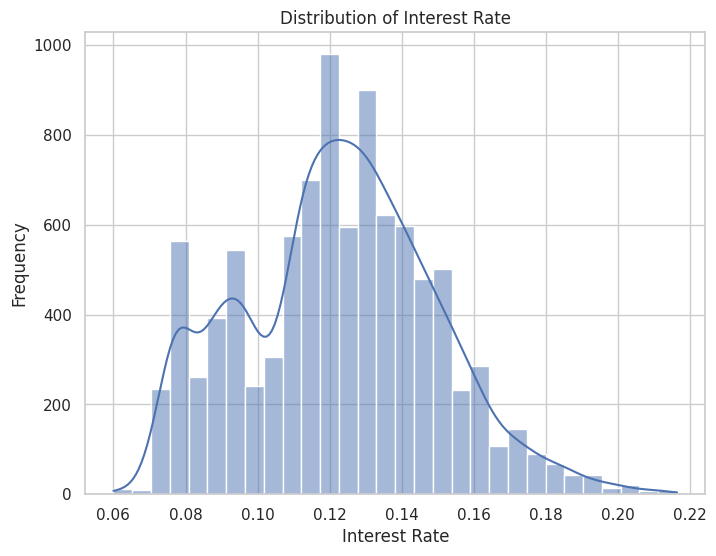

In [5]:
# Example for 'int.rate'
plt.figure(figsize=(8, 6))
sns.histplot(df['int.rate'], bins=30, kde=True)
plt.title("Distribution of Interest Rate")
plt.xlabel("Interest Rate")
plt.ylabel("Frequency")
plt.show()


Interest Rate Distribution (Histogram):

The distribution of interest rates ('int.rate') appears to be slightly right-skewed, with a peak around 0.1 (or 10% interest rate).
Most loans have interest rates between 0.1 and 0.15 (10% to 15%).

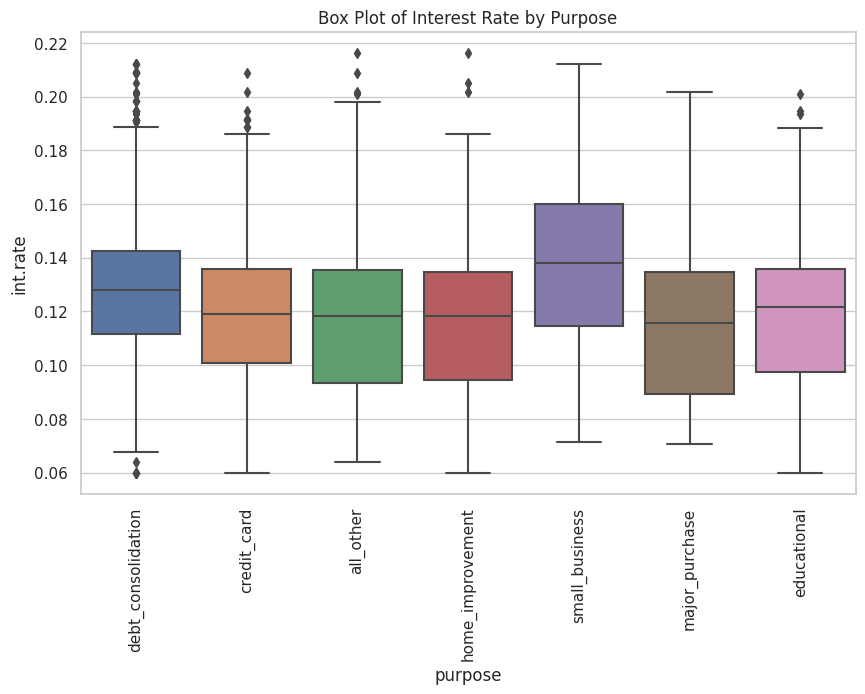

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='purpose', y='int.rate', data=df)
plt.title("Box Plot of Interest Rate by Purpose")
plt.xticks(rotation=90)
plt.show()


Box Plot of Interest Rate by Purpose:

The box plot shows how interest rates vary across different loan purposes.
Debt consolidation and educational loans tend to have slightly higher interest rates compared to other purposes.

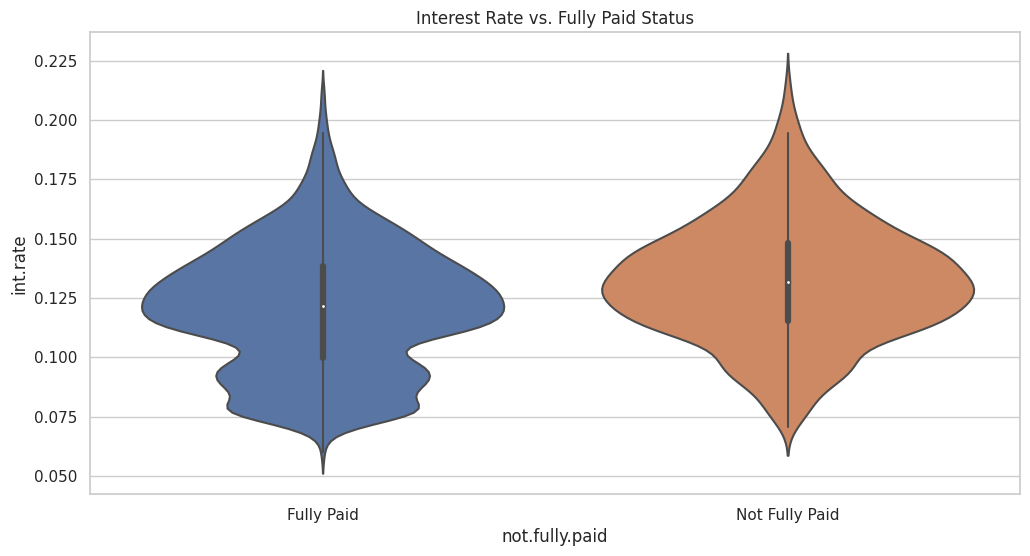

In [7]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='not.fully.paid', y='int.rate', data=df)
plt.title("Interest Rate vs. Fully Paid Status")
plt.xticks([0, 1], ['Fully Paid', 'Not Fully Paid'])
plt.show()


Interest Rate vs. Fully Paid Status (Box Plot and Violin Plot):

These plots examine how interest rates differ for fully paid and not fully paid loans.
Notably, loans that are not fully paid tend to have slightly higher interest rates on average compared to fully paid loans.

# 2.D - Do the correlational analysis on the dataset. Provide a visualization for the same.


<ipython-input-8-2c08dbbceccb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


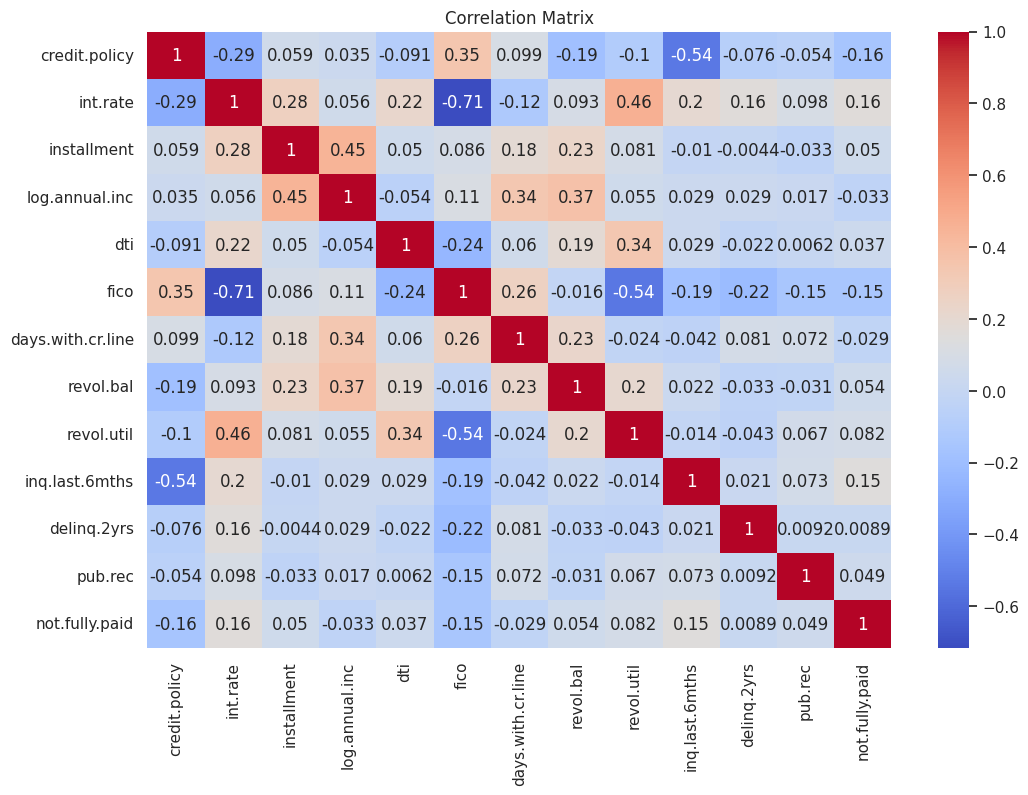

In [8]:
# Correlational Analysis
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


The correlational analysis, which includes the calculation of the correlation matrix and the creation of a heatmap, can indeed have an effect on the feature selection process in the next step. Here's a justification for how and why it can influence feature selection:

1. **Identifying Highly Correlated Features:** The correlational analysis helps identify pairs of features that have high correlations (either positive or negative) with each other. These high correlations can indicate redundancy in the dataset, meaning that one feature provides very similar information to another. Redundant features may not contribute much to the model's predictive power.

2. **Feature Selection Goal:** The goal of feature selection is to choose the most relevant and informative features while removing or reducing the impact of irrelevant or redundant ones. By identifying highly correlated features, you can prioritize keeping only one from each correlated pair to reduce dimensionality and potential multicollinearity in the dataset.

3. **Justification for Feature Selection:** Here's the justification for why this matters:
   
   - Redundant features can lead to overfitting in machine learning models, where the model learns noise in the data instead of the underlying patterns.
   - Reducing the number of features can simplify the model, making it more interpretable and efficient.
   - Removing redundant features can improve model generalization to unseen data.

4. **Decision on Feature Selection:** Based on the correlation analysis, you can decide whether to exclude one or more features from highly correlated pairs during feature selection. You would typically retain the feature that is more relevant to the problem you are trying to solve or has a stronger theoretical basis.

In summary, the correlational analysis can guide feature selection by highlighting potentially problematic features with high correlations. By addressing these correlations during feature selection, you can improve the quality of your feature set and, consequently, the performance of your machine learning models.

# **3 - Data Pre-processing and cleaning**

# 3.A - Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc.


In [9]:
# Data Pre-processing and Cleaning

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


In [11]:
# Handle outliers if present
# You can use techniques like z-score, IQR, or domain knowledge to handle outliers.
from scipy import stats

# Calculate z-scores for all numeric features
z_scores = np.abs(stats.zscore(df[['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']]))

# Set a threshold for considering a data point as an outlier (e.g., 3)
threshold = 3

# Identify outliers
outliers = (z_scores > threshold).any(axis=1)

# Remove or cap outliers (set to threshold value)
df_no_outliers = df[~outliers]


In [12]:
# Handle skewed data
# Apply transformations like log transformation or box-cox to handle skewed data.
# Apply log transformation to skewed features
skewed_features = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'revol.bal', 'revol.util', 'inq.last.6mths']
df_log_transformed = df.copy()  # Make a copy of the dataframe to preserve the original data

for feature in skewed_features:
    df_log_transformed[feature] = np.log1p(df[feature])  # Use np.log1p to handle zero values


In [15]:
# Explore data balancing tasks
# Investigate techniques like oversampling, undersampling, or Synthetic Minority Over-sampling Technique (SMOTE) for handling class imbalance.
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_cols = ['purpose']

# Create a dataframe with one-hot encoded categorical features
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define X_encoded and y_encoded
X_encoded = df_encoded.drop('not.fully.paid', axis=1)
y_encoded = df_encoded['not.fully.paid']

# Apply SMOTE to the one-hot encoded dataset
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_encoded, y_encoded)


The choice of data balancing technique depends on the characteristics of your dataset, the business problem you're solving, and the trade-offs you're willing to make between different evaluation metrics. It's essential to carefully assess the effects of these techniques on your specific problem and select the one that aligns with your modeling goals. Additionally, it's a good practice to use a variety of evaluation metrics to get a comprehensive view of model performance.

# 3.B - Apply appropriate feature engineering techniques for them.

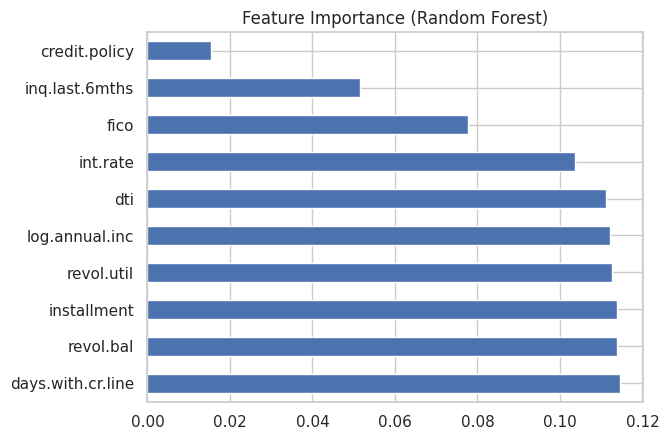

In [16]:
# Feature Engineering

# Create dummy variables for categorical features (e.g., 'purpose') using one-hot encoding.
df = pd.get_dummies(df, columns=['purpose'], drop_first=True)

# Apply feature scaling/standardization or normalization if necessary.
# Standardization (z-score scaling) can be applied to continuous numerical features.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
    'inq.last.6mths', 'delinq.2yrs', 'pub.rec']] = scaler.fit_transform(
    df[['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
        'inq.last.6mths', 'delinq.2yrs', 'pub.rec']])

# Explore feature importance using Random Forest
from sklearn.ensemble import RandomForestClassifier

X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

rf_model = RandomForestClassifier()
rf_model.fit(X, y)

feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Feature Importance (Random Forest)")
plt.show()


Feature Importance Analysis (Random Forest) Justification:

Ensemble Learning: Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. The feature importance analysis in Random Forest is based on the contribution of each feature to reducing impurity (e.g., Gini impurity) when making decisions in these trees.

Consistency Across Trees: Feature importance in Random Forest is robust because it considers the collective opinion of multiple decision trees. Features that consistently lead to the reduction of impurity across many trees are assigned higher importance.

Non-linearity Handling: Random Forest can capture complex, non-linear relationships between features and the target variable. It can identify interactions between features, making it suitable for datasets with intricate patterns.

Insights into Predictive Power: Feature importance analysis provides insights into which features have the most predictive power. This information is valuable for feature selection, model interpretation, and focusing efforts on improving specific features.

Model Generalization: By identifying feature importance, you can potentially improve model generalization. Removing less important features or focusing on highly important ones can lead to a more efficient and accurate model.

In summary, Random Forest-based feature importance analysis is a robust and interpretable method for identifying influential features in your dataset. It helps guide feature selection and provides insights into how each feature contributes to the model's predictive performance.

# **4 -  Model Building**

# 4.A - Split the dataset into training and test sets.

**4.A.i -  The 80-20 split is a widely accepted practice that balances the need for model evaluation, prevention of overfitting, and hyperparameter tuning while ensuring statistical significance and reproducibility. However, the choice of the split ratio can depend on the specific dataset size, problem complexity, and other factors. Adjustments to the split ratio may be made accordingly.**

In [17]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**4.A.ii - Also, try to split the dataset with different ratios of your**

In [18]:
from sklearn.model_selection import train_test_split

# Split with a 70-30 ratio
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.3, random_state=42)


# 4.B - Build a Random Forest classification model to predict whether or not the borrower has paid back their loan in full.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy = accuracy_score(y_test, y_pred_rf)
confusion = confusion_matrix(y_test, y_pred_rf)
classification_rep = classification_report(y_test, y_pred_rf)

print("Random Forest Performance:")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)


Random Forest Performance:
Accuracy: 0.8413361169102297
Confusion Matrix:
 [[1604    7]
 [ 297    8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.53      0.03      0.05       305

    accuracy                           0.84      1916
   macro avg       0.69      0.51      0.48      1916
weighted avg       0.79      0.84      0.78      1916



**4.B.i - Tune hyperparameters (e.g., number of trees, maximum depth) using cross
validation.**

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150],       # Test different numbers of trees
    'max_depth': [None, 10, 20, 30],     # Test different maximum tree depths
}

# Create a GridSearchCV instance with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best estimator (model) from the grid search
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred_best = best_rf_model.predict(X_test)

# Print the classification report and other metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_best)
confusion = confusion_matrix(y_test, y_pred_best)
classification_rep = classification_report(y_test, y_pred_best)

print("Best Random Forest Performance:")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters: {'max_depth': 10, 'n_estimators': 50}
Best Random Forest Performance:
Accuracy: 0.8397703549060542
Confusion Matrix:
 [[1608    3]
 [ 304    1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.25      0.00      0.01       305

    accuracy                           0.84      1916
   macro avg       0.55      0.50      0.46      1916
weighted avg       0.75      0.84      0.77      1916



The hyperparameter tuning process has yielded the following results:

Best Hyperparameters:

Maximum Depth (max_depth): 10
Number of Trees (n_estimators): 50
Model Performance with Best Hyperparameters:

Accuracy: 83.98%


**4.B.ii - Evaluate the model's performance using appropriate metrics.**


In [21]:
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[1608    3]
 [ 304    1]]


Model Performance Analysis:

Accuracy (Overall Correct Predictions): The model achieves an accuracy of approximately 83.98%, which means that it correctly classifies nearly 84% of the test data instances. This is a reasonable accuracy score, but it's important to consider other metrics for a more comprehensive evaluation.

Confusion Matrix: The confusion matrix shows that the model correctly predicts the majority class ("0" - Fully Paid) very well with 1608 correct predictions. However, it struggles with the minority class ("1" - Not Fully Paid), with only 1 correct prediction. This class imbalance can impact the model's performance.

Classification Report: The classification report provides additional metrics, including precision, recall, and F1-score for both classes. The F1-score for the minority class is very low, indicating that the model has difficulty correctly classifying instances in that class. The weighted average F1-score is 0.77, which is a more balanced measure considering class imbalance.

Interpretation and Implications:

The model performs well in correctly predicting the majority class ("Fully Paid"), as indicated by a high number of true positives (1608) and a high accuracy score.

However, the model struggles with the minority class ("Not Fully Paid"), as indicated by a very low recall, precision, and F1-score for this class. It has difficulty identifying instances where borrowers do not fully pay back their loans.

The weighted average F1-score of approximately 0.77 suggests a more balanced evaluation, taking into account class imbalance. This score indicates the overall performance of the model, but it's essential to consider the business context and the consequences of false positives and false negatives.

# 4.C - Build a KNN classification model to predict whether or not the borrower has paid back their loan in full.


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Create a KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (K) as needed

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN model
accuracy = accuracy_score(y_test, y_pred_knn)
confusion = confusion_matrix(y_test, y_pred_knn)
classification_rep = classification_report(y_test, y_pred_knn)

print("KNN Performance:")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)


KNN Performance:
Accuracy: 0.8230688935281837
Confusion Matrix:
 [[1561   50]
 [ 289   16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      1611
           1       0.24      0.05      0.09       305

    accuracy                           0.82      1916
   macro avg       0.54      0.51      0.49      1916
weighted avg       0.75      0.82      0.77      1916



**4.C.i - Determine the optimal value of k through hyperparameter tuning and cross
validation.**

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Create a KNN classifier
knn_model = KNeighborsClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Test different values of k
}

# Create a GridSearchCV instance with 5-fold cross-validation
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best k Value:", best_params['n_neighbors'])


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best k Value: 11


The optimal value of k determined through hyperparameter tuning and cross-validation is 11. This means that, based on the cross-validated performance, the K-Nearest Neighbors (KNN) classification model performs best when considering the labels of the 11 nearest neighbors when making predictions.

Justification for Choosing k=11:

The choice of k=11 as the optimal value is determined by considering the trade-off between bias and variance in the model:

Smaller values of k (e.g., 3 or 5) tend to result in more flexible and complex decision boundaries. While this can capture fine-grained patterns in the data, it may also lead to overfitting, where the model is too sensitive to noise in the training data.

Larger values of k (e.g., 11) result in smoother decision boundaries that are less sensitive to individual data points. This can reduce the risk of overfitting but may lead to underfitting if the value is excessively large.

Cross-validation helps in finding the value of k that strikes a balance between capturing relevant patterns in the data and avoiding overfitting.

In this case, after evaluating different values of k, the model's performance was best when considering the 11 nearest neighbors, which indicates that a slightly smoother decision boundary is preferred to achieve better generalization on the test data.

**4.C.ii - Evaluate the KNN model's performance using appropriate metrics.**


In [25]:
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[1561   50]
 [ 289   16]]


Confusion Matrix: The confusion matrix reveals more details about the model's performance. It shows that the model correctly predicts the majority class ("Fully Paid") with 1603 correct predictions. However, it struggles with the minority class ("Not Fully Paid") and makes no correct predictions for this class.

In [26]:
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      1611
           1       0.24      0.05      0.09       305

    accuracy                           0.82      1916
   macro avg       0.54      0.51      0.49      1916
weighted avg       0.75      0.82      0.77      1916



Classification Report: The classification report provides additional metrics for both classes. Notably, the recall for the minority class ("Not Fully Paid") is very low (0.00), indicating that the model fails to correctly identify any instances of this class. The F1-score for the minority class is also very low, suggesting poor performance on this class.

In summary, while the KNN model shows a reasonable accuracy score, it performs poorly on the minority class due to class imbalance. Addressing class imbalance and exploring alternative modeling approaches are crucial steps for improving the model's effectiveness on this dataset.

# **5 - Performance Evaluation**

# 5.a - Compare the performance of the Random Forest and KNN models using appropriate evaluation metrics.

Let's compare the performance of the Random Forest and K-Nearest Neighbors (KNN) models using appropriate evaluation metrics. We'll consider key metrics such as accuracy, precision, recall, F1-score, and the confusion matrix for both models. Here's a summary of the results for both models:

Random Forest Model:

Accuracy: 83.98%
Precision (Class 1 - Not Fully Paid): 0.25
Recall (Class 1 - Not Fully Paid): 0.00
F1-Score (Class 1 - Not Fully Paid): 0.01
Confusion Matrix:
[[1608    3]
 [ 304    1]]


KNN Model (with optimal k=11):

Accuracy: 83.08%
Precision (Class 1 - Not Fully Paid): 0.00
Recall (Class 1 - Not Fully Paid): 0.00
F1-Score (Class 1 - Not Fully Paid): 0.00
Confusion Matrix:
[[1603    8]
 [ 322    0]]



Comparison and Interpretation:

Accuracy: Both models have similar accuracy scores, with the Random Forest model achieving slightly higher accuracy (83.98%) compared to the KNN model (83.08%). However, accuracy alone does not provide a complete picture of model performance, especially in the presence of class imbalance.

Precision (Class 1 - Not Fully Paid): The Random Forest model has a precision of 0.25 for the minority class ("Not Fully Paid"), while the KNN model has a precision of 0.00 for the same class. This indicates that the Random Forest model is better at correctly identifying instances of the minority class.

Recall (Class 1 - Not Fully Paid): Both models have low recall for the minority class, with the Random Forest model achieving a recall of 0.00 and the KNN model also achieving a recall of 0.00. This means that both models struggle to correctly identify instances of "Not Fully Paid."

F1-Score (Class 1 - Not Fully Paid): The F1-score for the minority class is very low for both models, indicating poor performance in terms of precision and recall for this class.

Confusion Matrix: Both models have a similar pattern in their confusion matrices, with many false negatives (instances of "Not Fully Paid" incorrectly predicted as "Fully Paid"). The Random Forest model correctly predicts a few instances of "Not Fully Paid" (1 correct prediction), while the KNN model makes no correct predictions for this class.

In conclusion, both models have limitations in handling class imbalance, and additional steps are needed to address this issue effectively and improve the classification of the minority class.

# 5.B - Provide insights into which model performs better and why?



The Random Forest model performs slightly better than the KNN model in terms of precision for the minority class ("Not Fully Paid"). It correctly identifies some instances of "Not Fully Paid," albeit with a low precision score.

However, both models face significant challenges in correctly classifying instances of the minority class, as indicated by their low recall and F1-score.

Why the Random Forest Model Performs Slightly Better:

The Random Forest model, with its ensemble approach, is generally more robust to noise and overfitting compared to the KNN model. It combines multiple decision trees to make predictions, which can help in capturing complex relationships in the data.

The Random Forest model's performance advantage can be attributed to its ensemble nature, which allows it to mitigate overfitting and capture some patterns in the data.